In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("Statistics project kick-off!")

Statistics project kick-off!


In [2]:
#DATA COLLECTION
#When dealing with nominal and ordinal variables in exploratory data analysis (EDA) using Python, there are several algorithms and techniques you can employ to gain insights into the data

In [3]:
#DATA COLLECTION
import pandas as pd #Load data in tabular format
df4 = pd.read_csv("patient_info.csv", sep= ';') #Load the file from the specific folder.
#Note: pd.read_csv and not Excel. Replace the \ for /. If the file has ; but need , use sep= ';' to replace the ; for ,

In [4]:
#DATA COLLECTION
#Identify the library for the df:
type(df4)

pandas.core.frame.DataFrame

In [5]:
#S T A T I S T I C S (EDA)
#view the column headers for df4
df4.keys() 

Index(['ID', 'SEX', 'AGE', 'ACC', 'ACC_TIME', 'ACC_DAYS', 'HRV', 'HRV_TIME',
       'HRV_HOURS', 'CPT_II', 'ADHD', 'ADD', 'BIPOLAR', 'UNIPOLAR', 'ANXIETY',
       'SUBSTANCE', 'OTHER', 'CT', 'MDQ_POS', 'WURS', 'ASRS', 'MADRS',
       'HADS_A', 'HADS_D', 'MED', 'MED_Antidepr', 'MED_Moodstab',
       'MED_Antipsych', 'MED_Anxiety_Benzo', 'MED_Sleep',
       'MED_Analgesics_Opioids', 'MED_Stimulants', 'filter_$'],
      dtype='object')

In [6]:
#S T A T I S T I C S (EDA)
#EXPLORATORY DATA ANALYSIS (EDA) 
    #DESCRIPTIVE STATISTICS
    #Central Tedency and Dispersion
df4.describe()



,ID,SEX,AGE,ACC,HRV,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,...,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
count,134.000000,134.000000,134.000000,134.000000,134.000000,80.000000,134.000000,134.000000,134.000000,134.000000,...,88.000000,103.000000,19.0,6.0,3.0,8.0,3.0,2.0,1.0,103.000000
mean,93.447761,0.477612,2.335821,0.865672,0.597015,20.750000,0.738806,0.380597,0.634328,0.776119,...,5.159091,0.495146,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.825243
std,77.397865,0.501373,1.075664,0.342284,0.492338,4.113885,0.440934,0.487356,0.836580,0.800768,...,4.034012,1.290036,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.381616
min,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,35.250000,0.000000,1.000000,1.000000,0.000000,18.750000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
50%,69.500000,0.000000,2.000000,1.000000,1.000000,22.000000,1.000000,0.000000,0.000000,1.000000,...,5.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
75%,104.750000,1.000000,3.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,240.000000,1.000000,4.000000,1.000000,1.000000,27.000000,1.000000,1.000000,2.000000,2.000000,...,14.000000,9.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [7]:
#S T A T I S T I C S (EDA)
pd.set_option('display.max_columns', None)

In [8]:
#S T A T I S T I C S (EDA)
#Looking the data:
#View the first 5 columns of the df4
df4.head() 

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6,1,11:00:00,21.0,0,1,0,1,0,1,0,1,1,1,54.0,53.0,26.0,12.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,1,0,0,1,0,0,1,1,1,83.0,62.0,11.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,1,0,1,0,0,1,0,0,0,72.0,60.0,6.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,1,0,1,0,1,1,0,0,9,82.0,46.0,19.0,12.0,6.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,1,1,1,0,1,0,1,1,1,60.0,56.0,28.0,10.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
#S T A T I S T I C S (EDA)
#Return the Mode: Use the value_counts() method in pandas to get the frequency count of each category in the nominal variable.
df4.value_counts() 

Series([], Name: count, dtype: int64)

In [10]:
#S T A T I S T I C S (EDA)
#View information about the total counts of the data, range, data type, memory usage:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      134 non-null    int64  
 1   SEX                     134 non-null    int64  
 2   AGE                     134 non-null    int64  
 3   ACC                     134 non-null    int64  
 4   ACC_TIME                116 non-null    object 
 5   ACC_DAYS                116 non-null    object 
 6   HRV                     134 non-null    int64  
 7   HRV_TIME                80 non-null     object 
 8   HRV_HOURS               80 non-null     float64
 9   CPT_II                  134 non-null    int64  
 10  ADHD                    134 non-null    int64  
 11  ADD                     134 non-null    int64  
 12  BIPOLAR                 134 non-null    int64  
 13  UNIPOLAR                134 non-null    int64  
 14  ANXIETY                 134 non-null    in

In [11]:
#S T A T I S T I C S (EDA)
#Find duplicates in the df4 for each row True: Duplicate, False: Not duplicate:
df4.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool

In [12]:
#S T A T I S T I C S (EDA)
#To find the number of duplicates:
df4.duplicated().sum()

0

In [13]:
df4

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6,1,11:00:00,21.0,0,1,0,1,0,1,0,1,1,1,54.0,53.0,26.0,12.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,1,0,0,1,0,0,1,1,1,83.0,62.0,11.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,1,0,1,0,0,1,0,0,0,72.0,60.0,6.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,1,0,1,0,1,1,0,0,9,82.0,46.0,19.0,12.0,6.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,1,1,1,0,1,0,1,1,1,60.0,56.0,28.0,10.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,236,1,2,1,9:30:00,"13,3",0,NaN,NaN,0,0,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,237,0,1,1,15:00:00,14,0,NaN,NaN,0,0,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,238,0,4,1,9:00:00,"14,6",0,NaN,NaN,0,0,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,239,0,4,1,9:00:00,"14,3",0,NaN,NaN,0,0,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


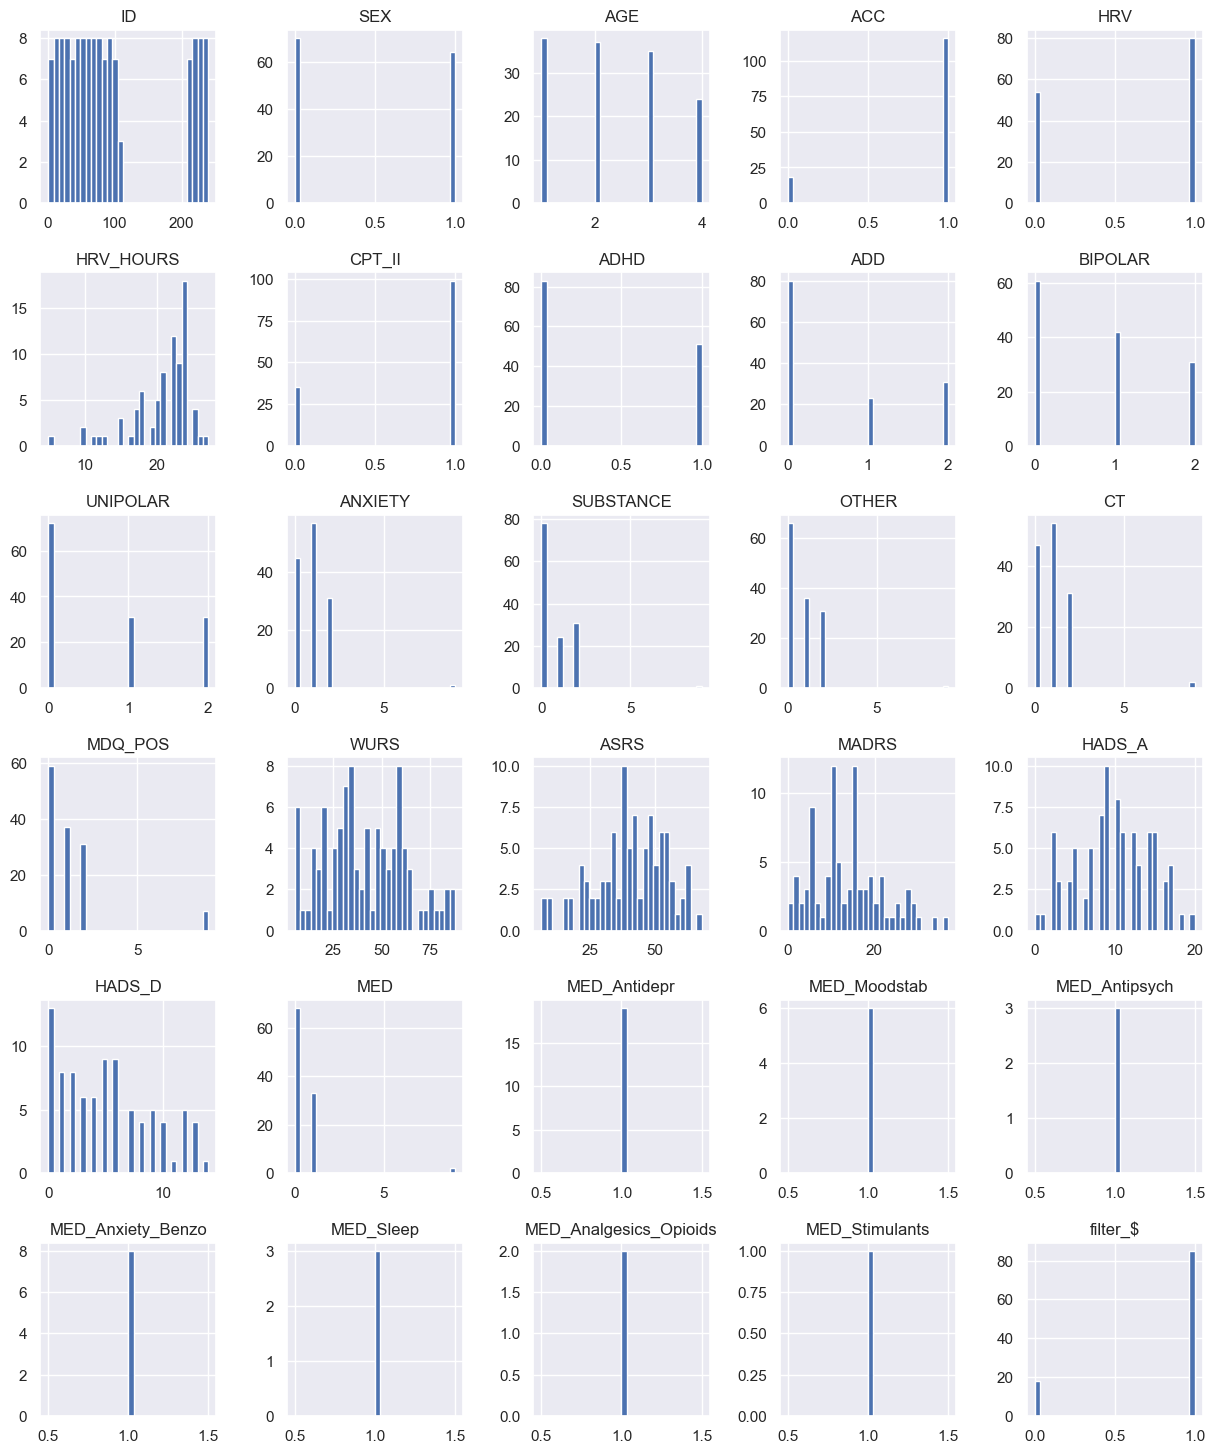

In [14]:
#S T A T I S T I C S (EDA)
#GRAPHICAL REPRESENTATION
#Histogram for all columns
import matplotlib.pyplot as plt

df4.hist(figsize=(15, 18), bins=30)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
#A total of 30 histograms are displayed. For the purpose of this project to analyze the associations between ADHD and co-occurring conditions such as anxiety, substance abuse. Understanding the age range
#to gain insights into their interrelationships and potential predictive factors. The following histograms will be considered:
#Age: Participant ages are presented in four groups, where (1) = 17-29 years, (2) = 30-39 years, (3) = 40-49 years and (4) = 50-67 years.
    #Analysis: Rigth Skewed Distribution. (Positively-Skewed).  Mean > Median
#ADHD: General presece of ADHD n=51. not present (0), present (1), or unknown (9)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Anxiety: not present (0), present (1), or unknown (9)
    #Analysis: #Note: Rigth Skewed Distribution. (Positively-Skewed). Mean > Median
#Substance: drug, alcohol, addictions. not present (0), present (1), or unknown (9) 
    #Analysis: Rigth Skewed Distribution. (Positively-Skewed). Mean > Median

In [15]:
#Decision: Select use case 
    #b) c). Analyze the associations between ADHD and other illness.
#The purpose of this project to analyze the associations between ADHD and co-occurring conditions such as anxiety, substance abuse. Understanding the age range
#to gain insights into their interrelationships and potential predictive factors. 
        # (Y = illness is the 'Target Variable') 
        # (X = ADHD, AGE)  0 or 1 boolean)
          #Note: maybe include ASRS variable in X for later.

In [16]:
#S T A T I S T I C S (EDA)
#VARIABLES DATA TYPES e.g., X
#Set up X and Y variables to go into a deeper analysis
#Lucky variables may impact the results of Y, if not included for X as the expalanatory variable.

X= df4[['ADHD', 'AGE']] #Setting the columns parameters that will be analyzed for variable X
#ADHD: not present (0), present (1), or unknown (9). ADHD Qualitative>Nominal>Categorical variable.
#AGE:  Groups (1) = 17-29 years, (2) = 30-39 years, (3) = 40-49 years and (4) = 50-67 years. AGE Qualitative>Ordinal variable
X

,ADHD,AGE
0,1,3
1,1,4
2,1,2
3,1,3
4,1,1
...,...,...
129,0,2
130,0,1
131,0,4
132,0,4


In [17]:
#S T A T I S T I C S (EDA)
#VARIABLES DATA TYPES e.g., Y
#Set up X and Y variables to go into a deeper analysis
#Lucky variables may impact the results of Y, if not included for X as the expalanatory variable.
Y= df4 [['ANXIETY','SUBSTANCE']] #Y= Target variable. Potential to include more variables for Y here. Lucky variables may impact the results of Y.
Y
#ANXIETY: not present (0), present (1), or unknown (9). ANXIETY Qualitative>Nominal variable
#SUBSTANCE: not present (0), present (1), or unknown (9). SUBSTANCE Qualitative>Nominal variable


,ANXIETY,SUBSTANCE
0,1,0
1,0,0
2,0,1
3,1,1
4,1,0
...,...,...
129,2,2
130,2,2
131,2,2
132,2,2


In [18]:
#S T A T I S T I C S (EDA)
#DATA TYPES in df4
#Explore the Data for X and Y:

X.shape
Y.shape

X.head()
Y.head()

X.info()
Y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ADHD    134 non-null    int64
 1   AGE     134 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ANXIETY    134 non-null    int64
 1   SUBSTANCE  134 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


In [19]:
#S T A T I S T I C S (EDA)
#DATA CLEANUP in df4
#Finding missing values: .isnull().sum() is one of many ways to check for missing values
X.isnull().sum() # no missing value is 0

ADHD    0
AGE     0
dtype: int64

In [20]:
#S T A T I S T I C S (EDA)
Y.isnull().sum() # no missing value is 0

ANXIETY      0
SUBSTANCE    0
dtype: int64

In [21]:
#S T A T I S T I C S (EDA)
#CENTRAL TENDENCY AND INFERENCIAL STATISTICS FOR X
#Looking Deeper for Exploratory Data Analysis: 
X.describe() #in df4
#Q3=75% of individuals do not have ADHD
#Q2= 50% Median
#Q1=25% of individuals do have ADHD

#Analysis: Mean Aproximately 38% of the individuals in the data set have ADHD withthe age group (2) = 30-39 years old

,ADHD,AGE
count,134.000000,134.000000
mean,0.380597,2.335821
std,0.487356,1.075664
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,1.000000,4.000000


In [22]:
#S T A T I S T I C S (EDA) in df4
X['ADHD'].unique() #displayed the numbers used for the data collection. not present (0), present (1), or unknown (9)

array([1, 0], dtype=int64)

In [23]:
#S T A T I S T I C S (EDA) in df4
#X['AGE'].unique() (1) #displayed the numbers used for the data collection.(1) = 17-29 years, (2) = 30-39 years, (3) = 40-49 years and (4) = 50-67 years.

In [24]:
#S T A T I S T I C S in df4
X['ADHD'].value_counts() #displayed the value counts associated with the data collection. not present (0), present (1), or unknown (9). 

ADHD
0    83
1    51
Name: count, dtype: int64

In [25]:
#S T A T I S T I C S in df4
X['AGE'].value_counts() #displayed the value counts associated with the data collection.

AGE
1    38
2    37
3    35
4    24
Name: count, dtype: int64

In [26]:
#CENTRAL TENDENCY AND INFERENCIAL STATISTICS FOR Y in df4
#Looking Deeper for Exploratory Data Analysis: 
Y.describe()
#Q3=75% of individuals do not have ANXIETY
#Q2= 50%  Median
#Q1=25% between 31 to 33 individuals have SUBSTANCE abuse

#Analysis: Mean Aproximately 95% of individuals have anxiety and 70% have subtance abuse

,ANXIETY,SUBSTANCE
count,134.000000,134.000000
mean,0.955224,0.708955
std,1.024993,1.102455
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,9.000000,9.000000


In [27]:
#S T A T I S T I C S in df4
Y['ANXIETY'].unique()  #displayed the numbers used for the data collection. not present (0), present (1), or unknown (9)

array([1, 0, 9, 2], dtype=int64)

In [28]:
#S T A T I S T I C S in df4
Y['SUBSTANCE'].unique() #displayed the numbers used for the data collection. not present (0), present (1), or unknown (9)

array([0, 1, 9, 2], dtype=int64)

In [29]:
#S T A T I S T I C S in df4
Y['ANXIETY'].value_counts() #displayed the value counts associated with the data collection. not present (0), present (1), or unknown (9). Remove the (9) as it is not valuable at this time

ANXIETY
1    57
0    45
2    31
9     1
Name: count, dtype: int64

In [30]:
#S T A T I S T I C S in df4
Y['SUBSTANCE'].value_counts() #displayed the value counts associated with the data collection. not present (0), present (1), or unknown (9). Remove the (9) as it is not valuable at this time

SUBSTANCE
0    78
2    31
1    24
9     1
Name: count, dtype: int64

In [31]:
#DATA CLEAN UP df4
#REMOVE Unknown (9) values in the dataset for all the ROWS:
    #print('Original DataFrame:')
    #print(df4)
    #print('\n')

    # Default configuration drops rows having at least 1 missing value
    #print('DataFrame 4 (df4) after dropping the rows having missing values:')
    #print(df4.dropna())

In [32]:
#DATA CLEAN UP df4
#REMOVE Unknown (9) for 'ANXIETY' 
condition=df4['ANXIETY']==9 #['ANXIETY'] Boolean Mask executed for the Unknown (9) values in the dataset, to be removed in all ROWS with (9) for this variable.
condition


0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: ANXIETY, Length: 134, dtype: bool

In [33]:
#DATA CLEAN UP df4
#REMOVE Unknown (9) for 'SUBSTANCE'
condition_1=df4['SUBSTANCE']==9 #['SUBSTANCE'] Boolean Mask executed for the Unknown (9) values in the dataset, to be removed in all ROWS with (9) for this variable.
condition_1


0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: SUBSTANCE, Length: 134, dtype: bool

In [34]:
#DATA CLEAN UP AND CREATION OF A NEW DATA FRAME AFTER CLEANING UP
df5 = df4.drop(25) #Create new data set df5

In [35]:
df5['ANXIETY'].value_counts()

ANXIETY
1    57
0    45
2    31
Name: count, dtype: int64

In [36]:
df5['SUBSTANCE'].value_counts()

SUBSTANCE
0    78
2    31
1    24
Name: count, dtype: int64

In [37]:
#DATA CLEAN UP df4
# REPLACE method to update (2) Cotrols as (0) not present, in the specified Y columns 'ANXIETY' and 'SUBSTANCE'

df5['ANXIETY'].replace(2, 0, inplace=True)
df5['SUBSTANCE'].replace(2, 0, inplace=True)

In [38]:
#DATA CLEAN UP df4
# Filter the dataframe df4 to have columns with only (0) not present and (1) present in X = ADHD, Y = ANXIETY, SUBSTANCE
# the applymap function to convert all values to 1 if they are 1 and 0 otherwise in the specified columns.
df5_filtered = df5[['ADHD', 'ANXIETY', 'SUBSTANCE']].applymap(lambda x: 1 if x == 1 else 0)

#Display the first few rows of the filtered dataframe
print(df5_filtered.head())

   ADHD  ANXIETY  SUBSTANCE
0     1        1          0
1     1        0          0
2     1        0          1
3     1        1          1
4     1        1          0


In [39]:
df5.head()

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6,1,11:00:00,21.0,0,1,0,1,0,1,0,1,1,1,54.0,53.0,26.0,12.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,1,0,0,1,0,0,1,1,1,83.0,62.0,11.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,1,0,1,0,0,1,0,0,0,72.0,60.0,6.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,1,0,1,0,1,1,0,0,9,82.0,46.0,19.0,12.0,6.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,1,1,1,0,1,0,1,1,1,60.0,56.0,28.0,10.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [40]:
df5.describe()

,ID,SEX,AGE,ACC,HRV,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
count,133.000000,133.000000,133.000000,133.000000,133.000000,79.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,98.000000,96.000000,90.000000,88.000000,88.000000,102.00000,19.0,6.0,3.0,8.0,3.0,2.0,1.0,102.000000
mean,93.947368,0.481203,2.345865,0.864662,0.593985,20.784810,0.736842,0.383459,0.639098,0.774436,0.699248,0.428571,0.180451,0.736842,0.939850,1.150376,41.132653,40.229167,13.844444,9.659091,5.159091,0.50000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.823529
std,77.473291,0.501536,1.073405,0.343378,0.492944,4.128298,0.442012,0.488067,0.837912,0.803558,0.825585,0.496743,0.386017,0.815519,1.035428,1.888948,21.027051,13.943102,8.141876,4.586052,4.034012,1.29546,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.383103
min,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,36.000000,0.000000,1.000000,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.250000,32.000000,8.250000,7.000000,2.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
50%,70.000000,0.000000,2.000000,1.000000,1.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,39.000000,41.500000,13.000000,10.000000,5.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
75%,105.000000,1.000000,3.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,57.750000,51.000000,18.750000,13.000000,8.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,240.000000,1.000000,4.000000,1.000000,1.000000,27.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,9.000000,9.000000,88.000000,68.000000,37.000000,20.000000,14.000000,9.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [41]:
#CREATE the varaiables in the df5 for X
X= df5[['ADHD', 'AGE']]


In [42]:
#CREATE the varaiables in the df5 for Y
Y= df5[['ANXIETY', 'SUBSTANCE']]

In [43]:
#S T A T I S T I C S (EDA) in df5
X['ADHD'].value_counts() #displayed the numbers used for the data collection. not present (0), present (1)

ADHD
0    82
1    51
Name: count, dtype: int64

In [44]:
#S T A T I S T I C S (EDA) in df5
X['AGE'].value_counts() #displayed the numbers used for the data collection. (1) = 17-29 years, (2) = 30-39 years, (3) = 40-49 years and (4) = 50-67 years

AGE
2    37
1    37
3    35
4    24
Name: count, dtype: int64

In [45]:
#S T A T I S T I C S (EDA) in df5
Y['ANXIETY'].value_counts()#displayed the numbers used for the data collection. not present (0), present (1)

ANXIETY
0    76
1    57
Name: count, dtype: int64

In [46]:
#S T A T I S T I C S (EDA) in df5
Y['SUBSTANCE'].value_counts() #displayed the numbers used for the data collection. not present (0), present (1)

SUBSTANCE
0    109
1     24
Name: count, dtype: int64

In [47]:
#S T A T I S T I C S (EDA) in df5
Y['ANXIETY'].unique() #displayed the numbers used for the data collection. not present (0), present (1)

array([1, 0], dtype=int64)

In [48]:
#S T A T I S T I C S (EDA) in df5 
Y['SUBSTANCE'].unique() #displayed the numbers used for the data collection. not present (0), present (1)

array([0, 1], dtype=int64)

In [49]:
#S T A T I S T I C S (EDA) in df5
df5.head() # View the five columns for the new dataset

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6,1,11:00:00,21.0,0,1,0,1,0,1,0,1,1,1,54.0,53.0,26.0,12.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,1,0,0,1,0,0,1,1,1,83.0,62.0,11.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,1,0,1,0,0,1,0,0,0,72.0,60.0,6.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,1,0,1,0,1,1,0,0,9,82.0,46.0,19.0,12.0,6.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,1,1,1,0,1,0,1,1,1,60.0,56.0,28.0,10.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


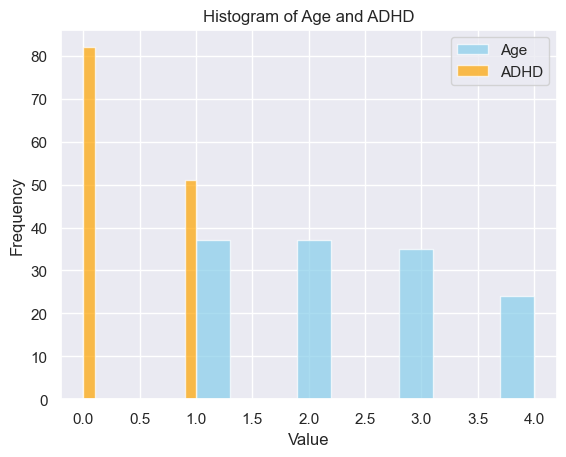

In [50]:
#S T A T I S T I C S (EDA) in df5
#HISTOGRAM GRAPHICAL REPRESENTATION
#Histogram is a freqeuncy distribution chart. Visualize the frequency counts using bar plots to understand the distribution of categories.
#Plot a Histogram for X:
plt.hist(df5['AGE'], bins=10, color='skyblue', alpha=0.7, label='Age')
plt.hist(df5['ADHD'], bins=10, color='orange', alpha=0.7, label='ADHD')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Age and ADHD')
plt.legend()
plt.show()

#Analysis:From 133 individuals: For ADHD, 82 do not have ADHD (0), 51 do have ADHD (1).
#For AGE, the following groups are distributed 37 individuals in group (1) = 17-29 years, 37 individuals in group (2) = 30-39 years, 35 individuals in group (3) = 40-49 years and 24 individuals in group (4) = 50-67 years.


In [51]:
#S T A T I S T I C S (EDA) in df5

#df5['AGE'].median()

#column_name = 'AGE'
#median = df4['AGE'].quantile(0.5)
#print (median)

Text(0.5, 1.0, 'AGE Box Plot')

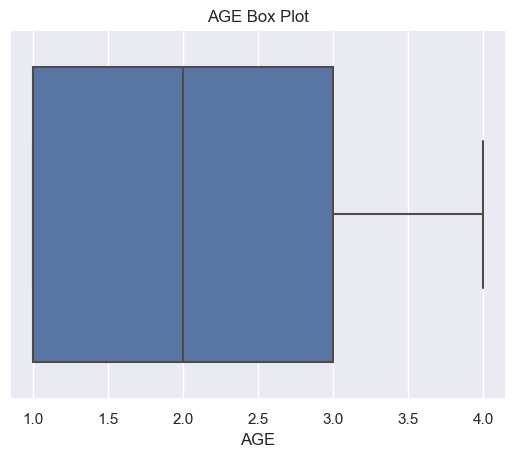

In [52]:
#S T A T I S T I C S (EDA) in df5
#For the ordinal variable "AGE," which is divided into four groups, use the following plot diagrams:
#Ordered Bar Plot: Since "Age" is an ordinal variable, an ordered bar plot can effectively display the frequency of participants in each age group.
##Box Plot: A box plot can be used to visualize the distribution and central tendency of the participant ages in the different groups.

#S T A T I S T I C S
sns.boxplot(x=df5["AGE"])
plt.title("AGE Box Plot")
#Analysis: From 133 individuals, the great majority of individuals are in the group (1) and (2) with 74 in total.
#Q1 = 1.00, Q2 = 2.00, Q3 = 3.00, MIN= 1, MAX = 4
#the following groups are distributed 37 individuals in group (1) = 17-29 years, 37 individuals in group (2) = 30-39 years, 35 individuals in group (3) = 40-49 years and 24 individuals in group (4) = 50-67 years.

In [53]:
# Calculate the IQR for the 'age' variable
Q1 = df5['AGE'].quantile(0.25)
Q3 = df5['AGE'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for age:", IQR)

#Analysis: 50% of the dataset for AGE is spread over group (2)

Interquartile Range (IQR) for age: 2.0


In [54]:
#S T A T I S T I C S (EDA) in df5
#For the nominal variable "ADHD," which has three categories (0)not present, (1)present, or (9)unknown), the following plot diagram:
#Bar Plot: A simple bar plot can be used to show the frequency of each category (not present, present, unknown) for ADHD.

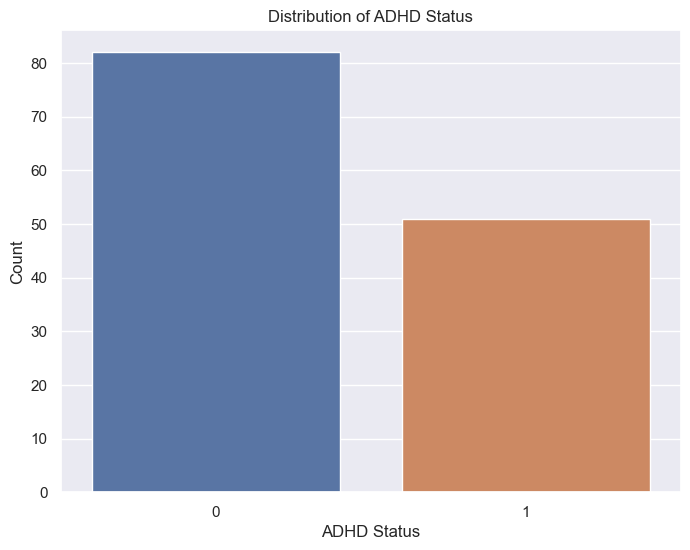

In [55]:
#S T A T I S T I C S (EDA) in df5
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='ADHD', data=df5)
# Customize the plot
plt.title('Distribution of ADHD Status')
plt.xlabel('ADHD Status')
plt.ylabel('Count')
# Show the plot
plt.show()
#Analysis:From 133 individuals: For ADHD, 82 do not have ADHD (0), 51 do have ADHD (1).

In [56]:
#S T A T I S T I C S (EDA) in df5
#Y VARIABLE
df5['ANXIETY'].median()


0.0

In [57]:
#S T A T I S T I C S (EDA) in df5
#Y VARIABLE
df5['SUBSTANCE'].median()


0.0

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


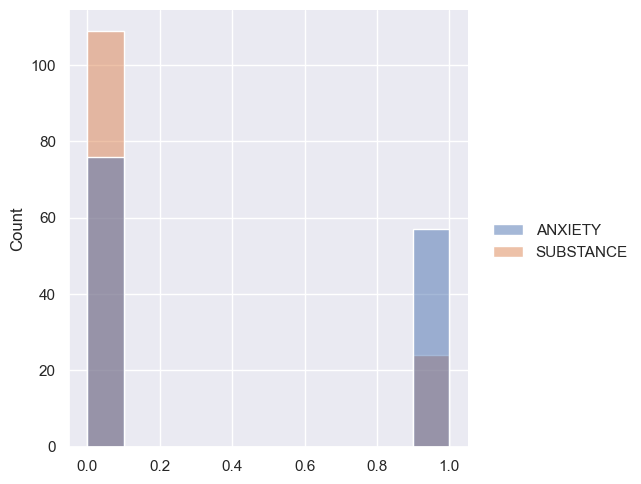

In [58]:
#S T A T I S T I C S (EDA) in df5
#HISTOGRAM GRAPHICAL REPRESENTATION
#Histogram is a freqeuncy distribution chart.Visualize the frequency counts using bar plots to understand the distribution of categories.
#Plot a Histogram for Y:
sns.displot(Y)
#Analysis: From 133 individuals:
#ANXIETY is not prensent in 76. In contrast 57 individuals have ANXIETY. 
#SUBSTANCE is not present in 109. Incontrast 24 individuals have SUBSTANCE. 
#If combining the results 81 individuals have ANXIETY and SUBSTANCE.Indicating that 42% of the individuals in the dataset have anxiety and 18% are using substances.      

In [59]:
#S T A T I S T I C (EDA) in df5 
#For the nominal variables "ANXIETY" and "SUBSTANCE" both having three categories (0) not present, (1) present, or (9) unknown, the following plot diagrams are suitable:
#Multiple Bar Plots: create multiple bar plots to display the frequency of each category (not present, present, unknown) for both "Anxiety" and "Substance" variables side by side.
#Stacked Bar Plots: Stacked bar plots can be used to show the total frequency of each variable and the contribution of each category within the variables


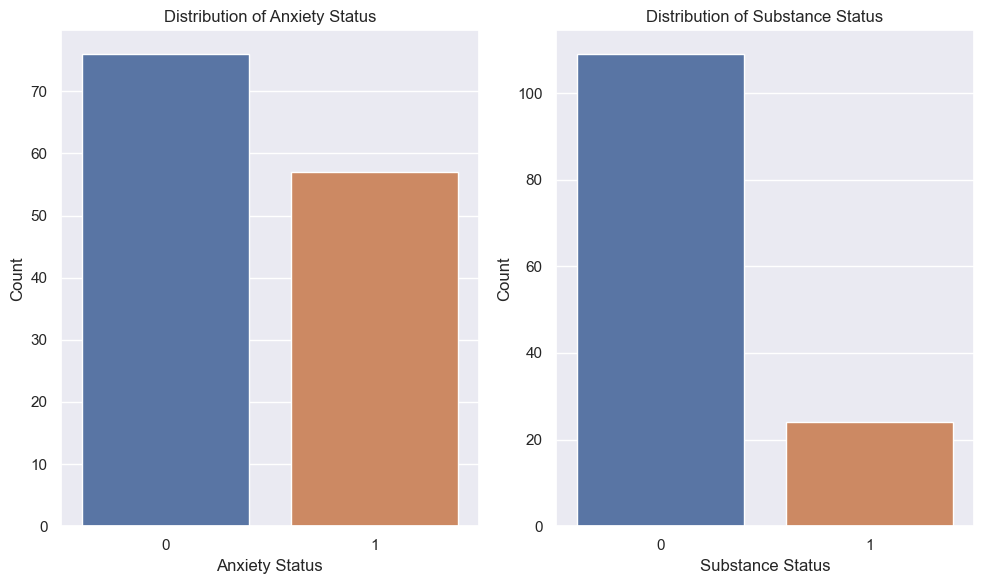

In [60]:
#S T A T I S T I C S (EDA) in df5
# Create the multiple bar plots for Anxiety and Substance variables
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Creating the first subplot for Anxiety
sns.countplot(x='ANXIETY', data=df5)
plt.title('Distribution of Anxiety Status')
plt.xlabel('Anxiety Status')
plt.ylabel('Count')
plt.subplot(1, 2, 2)  # Creating the second subplot for Substance
sns.countplot(x='SUBSTANCE', data=df5)
plt.title('Distribution of Substance Status')
plt.xlabel('Substance Status')
plt.ylabel('Count')
plt.tight_layout()  # Adjust the subplots to prevent overlapping
plt.show()

#ANXIETY is not prensent in 76. In contrast 57 individuals have ANXIETY. 
#SUBSTANCE is not present in 109. Incontrast 24 individuals have SUBSTANCE. 
#If combining the results 81 individuals have ANXIETY and SUBSTANCE.Indicating that 42% of the individuals in the dataset have anxiety and 18% are using substances.      

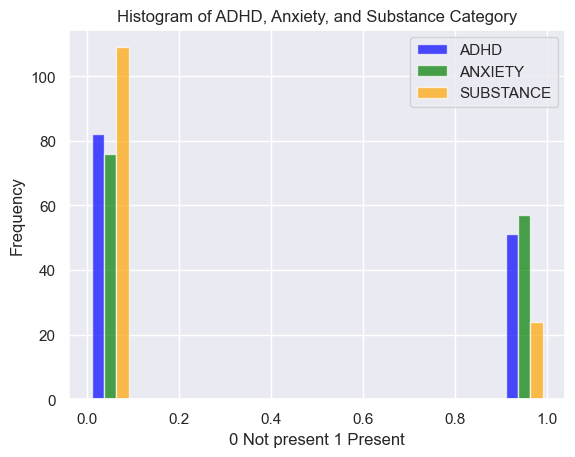

In [61]:
# Create a histogram for all the variables
plt.hist([df5['ADHD'], df5['ANXIETY'], df5['SUBSTANCE']], bins=10, color=['blue', 'green', 'orange'], alpha=0.7, label=['ADHD', 'ANXIETY', 'SUBSTANCE'])
plt.xlabel('0 Not present 1 Present')
plt.ylabel('Frequency')
plt.title('Histogram of ADHD, Anxiety, and Substance Category')
plt.legend()
plt.show()
#Analysis: In the (0) not present, 61% of the individuals do not have ADHD with 82 individuals. 57% do not have ANXIETY with 76 individuals and 81% do not have SUBSTANCE wiht 109 individuals.
#In the (1) present group, 38% individuals have ADHD with 51 individuals. 43% have ANXIETY with 57 individuals and 18% have SUBSTANCE with 24 individuals. 

In [62]:
df5.info() #Viewing the new dataset information in df5

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 133
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      133 non-null    int64  
 1   SEX                     133 non-null    int64  
 2   AGE                     133 non-null    int64  
 3   ACC                     133 non-null    int64  
 4   ACC_TIME                115 non-null    object 
 5   ACC_DAYS                115 non-null    object 
 6   HRV                     133 non-null    int64  
 7   HRV_TIME                79 non-null     object 
 8   HRV_HOURS               79 non-null     float64
 9   CPT_II                  133 non-null    int64  
 10  ADHD                    133 non-null    int64  
 11  ADD                     133 non-null    int64  
 12  BIPOLAR                 133 non-null    int64  
 13  UNIPOLAR                133 non-null    int64  
 14  ANXIETY                 133 non-null    int64  

In [63]:
#S T A T I S T I C S (EDA) in df5
#Chi-Square Test: Perform a chi-square test to determine if there is a significant association between the nominal variable and another variable.

from scipy.stats import chi2_contingency
import pandas as p

In [64]:
#S T A T I S T I C S
# Create the contingency table as a DataFrame
df5_contingency_table = pd.crosstab(df5['AGE'], df5['ANXIETY'])

Chi-squared statistic: 0.9069256756756758
P-value: 0.8237561705191967
Degrees of freedom: 3
Expected frequencies: [[21.14285714 15.85714286]
 [21.14285714 15.85714286]
 [20.         15.        ]
 [13.71428571 10.28571429]]


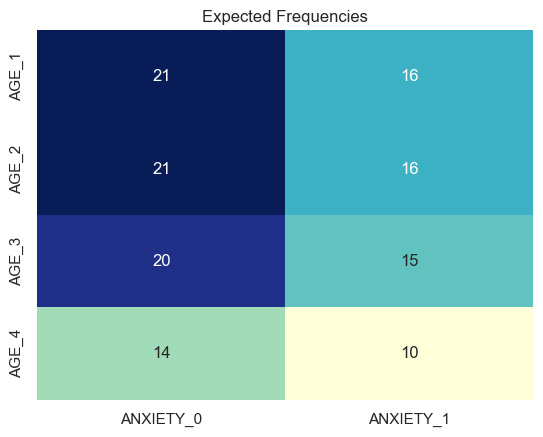

In [65]:
#S T A T I S T I C S
#df5 has the observed frequencies for the categorical variables. chi2_contingency function is provides the chi-squared statistic, p-value, degrees of freedom, and expected frequencies.

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(df5_contingency_table )

# Display the chi-squared statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
#S T A T I S T I C S
#
#A heatmap is created using seaborn and matplotlib to visualize the expected frequencies
# Create a heatmap to visualize the expected frequencies
labels = sns.heatmap(expected, annot=True, cmap="YlGnBu", cbar=False)

plt.title('Expected Frequencies')

# Set the axis labels for the heatmap
labels.set_xticklabels(['ANXIETY_0', 'ANXIETY_1'])  # Set x-axis labels
labels.set_yticklabels(['AGE_1', 'AGE_2', 'AGE_3', 'AGE_4'])  # Set y-axis labels

plt.show()
#Analysis: From the 133 individuals in the dataset, 43% have ANXIETY, being more predominat in age groups (1) and (2) with 24% in total.
#Age (1) = 17-29 years, (2) = 30-39 years.
#Ho Null Hypothesis: There is no significant association between adults AGE and ANXIETY in adults.So no relationship between age and anxiety levels in the adult population under study.

#Chi-squared statistic: 0.9069256756756758 Based on the result it is a low association.
#P-value: 0.8237561705191967 indicates the probability of observing the data, if the null hypothesis H0 is true. A high p-value (close to 1) suggests that the observed data is likely under the assumption of the null hypothesis, indicating a lack of evidence against the null hypothesis.
#The results indicate that the variables are likely independent of each other for AGE and ANXIETY.
#Degrees of freedom: 3 number of categories minus 1. In this case, it suggests that there are 3 degrees of freedom
#is no significant association between the categorical variables tested AGE and ANXIETY, as suggested by the high p-value and low chi-squared statistic.

In [66]:
#S T A T I S T I C S
# Create the contingency table as a DataFrame
df5_contingency_table2 = pd.crosstab(df5['AGE'], df5['SUBSTANCE'])

Chi-squared statistic: 3.490771361958289
P-value: 0.32196101817316936
Degrees of freedom: 3
Expected frequencies: [[30.32330827  6.67669173]
 [30.32330827  6.67669173]
 [28.68421053  6.31578947]
 [19.66917293  4.33082707]]


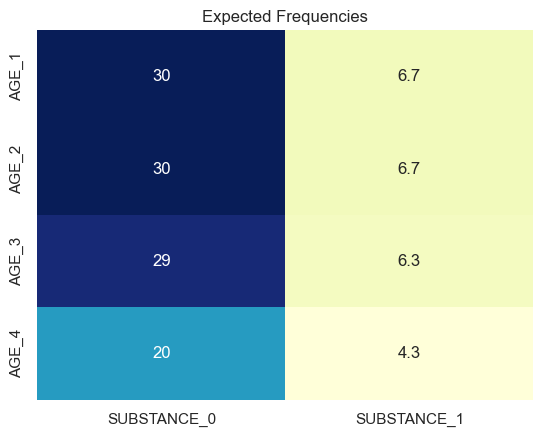

In [67]:
#S T A T I S T I C S
#df5 has the observed frequencies for the categorical variables. chi2_contingency function is provides the chi-squared statistic, p-value, degrees of freedom, and expected frequencies.

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(df5_contingency_table2)

# Display the chi-squared statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

#A heatmap is created using seaborn and matplotlib to visualize the expected frequencies
# Create a heatmap to visualize the expected frequencies
labels = sns.heatmap(expected, annot=True, cmap="YlGnBu", cbar=False)

plt.title('Expected Frequencies')

# Set the axis labels for the heatmap
labels.set_xticklabels(['SUBSTANCE_0', 'SUBSTANCE_1'])  # Set x-axis labels
labels.set_yticklabels(['AGE_1', 'AGE_2', 'AGE_3', 'AGE_4'])  # Set y-axis labels

plt.show()

#Ho Null Hypothesis:There is no significant association between AGE and SUBSTANCE ABUSE in adults. So no relationship between age and the incidence of substance abuse in the adult population under study.
#Chi-squared statistic: 3.490771361958289. The value suggests a moderate magnitude of association
#P-value: 0.32196101817316936. Fail to reject the null hypothesis, 0.32 is greater than the typical significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis, indicating a lack of association between the variables.
#AGE and SUBSTANCE are likely independent of each other in the adult population under study.
#Degrees of freedom: 3
#the chi-squared test results indicate that there is no significant association between the categorical variables tested AGE and SUBSTANCE, as suggested by the high p-value and a moderate but not strong chi-squared statistic.


In [68]:
# Filtering the dataframe
filtered_participants_ADHD = df5[(df5['ADHD'] == 1) & (df5['ANXIETY'] == 1) & (df5['SUBSTANCE'] == 1)]

# Displaying the results
print(filtered_participants_ADHD)

    ID  SEX  AGE  ACC  ACC_TIME ACC_DAYS  HRV  HRV_TIME  HRV_HOURS  CPT_II  \
3    4    1    3    0       NaN      NaN    1  16:55:00       22.0       1   
6    8    0    2    1  12:00:00      4.3    0       NaN        NaN       1   
24  26    1    2    1  15:30:00      2.2    0       NaN        NaN       1   
45  48    1    1    1  13:30:00      7.2    1  13:30:00       20.0       1   
63  66    1    3    0       NaN      NaN    1  10:02:00       20.0       1   
83  87    0    1    1  11:00:00      7.1    1  11:00:00       22.0       1   
84  88    1    4    1  17:00:00      7.1    1  17:00:00       19.0       1   
87  91    1    3    1  14:30:00      7.4    1  11:00:00       21.0       1   

    ADHD  ADD  BIPOLAR  UNIPOLAR  ANXIETY  SUBSTANCE  OTHER  CT  MDQ_POS  \
3      1    0        1         0        1          1      0   0        9   
6      1    0        1         0        1          1      1   1        1   
24     1    0        1         0        1          1      0   1      

In [69]:
filtered_participants_ADHD

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,1,0,1,0,1,1,0,0,9,82.0,46.0,19.0,12.0,6.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.0
6,8,0,2,1,12:00:00,4.3,0,NaN,NaN,1,1,0,1,0,1,1,1,1,1,70.0,63.0,19.0,17.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
24,26,1,2,1,15:30:00,2.2,0,NaN,NaN,1,1,0,1,0,1,1,0,1,1,57.0,46.0,9.0,9.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
45,48,1,1,1,13:30:00,7.2,1,13:30:00,20.0,1,1,0,0,1,1,1,1,1,0,50.0,40.0,12.0,15.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
63,66,1,3,0,NaN,NaN,1,10:02:00,20.0,1,1,0,0,0,1,1,0,0,1,35.0,40.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,87,0,1,1,11:00:00,7.1,1,11:00:00,22.0,1,1,1,0,1,1,1,0,1,0,36.0,42.0,23.0,8.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
84,88,1,4,1,17:00:00,7.1,1,17:00:00,19.0,1,1,0,0,1,1,1,0,1,1,88.0,62.0,16.0,16.0,12.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
87,91,1,3,1,14:30:00,7.4,1,11:00:00,21.0,1,1,1,1,0,1,1,0,1,1,59.0,46.0,22.0,14.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [70]:
# Printing only the specified columns
print(filtered_participants_ADHD[['AGE', 'ADHD', 'ANXIETY', 'SUBSTANCE']])

    AGE  ADHD  ANXIETY  SUBSTANCE
3     3     1        1          1
6     2     1        1          1
24    2     1        1          1
45    1     1        1          1
63    3     1        1          1
83    1     1        1          1
84    4     1        1          1
87    3     1        1          1


In [71]:
len(filtered_participants_ADHD)

8

In [72]:
filtered_participants_ADHD['ADHD'].value_counts()

ADHD
1    8
Name: count, dtype: int64

In [73]:
filtered_participants_ADHD['ANXIETY'].value_counts()

ANXIETY
1    8
Name: count, dtype: int64

In [74]:
filtered_participants_ADHD['SUBSTANCE'].value_counts()

SUBSTANCE
1    8
Name: count, dtype: int64

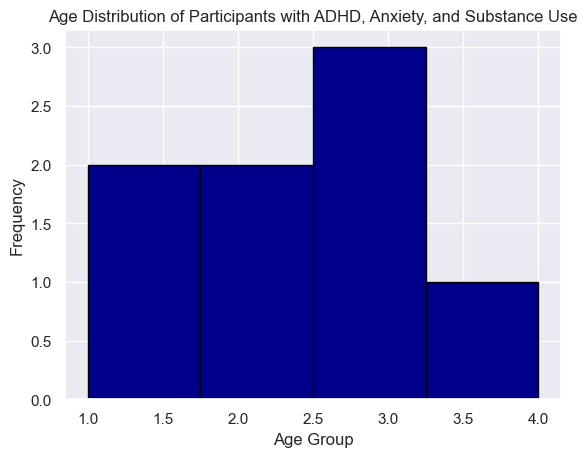

In [75]:
# Creating a histogram for the 'Age' column
plt.hist(filtered_participants_ADHD['AGE'], bins=4, color='darkblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution of Participants with ADHD, Anxiety, and Substance Use')

# Displaying the histogram
plt.show()
#Analysis: From 51 patients with ADHD, 8 has ANXIETY  = 15.68% and 8 has a SUBSTANCE = 15.68%.  As a result, 31.37% of individuals with ADHD have ANXIETY and SUBSTANCE abuse.
# The age distribution is higher in group (3) =(40-49) years old


In [76]:
# Filtering the dataframe
filtered_participants_without_ADHD = df5[(df5['ADHD'] == 0) & (df5['ANXIETY'] == 1) & (df5['SUBSTANCE'] == 1)]

# Displaying the results
print(filtered_participants_without_ADHD)

      ID  SEX  AGE  ACC  ACC_TIME ACC_DAYS  HRV  HRV_TIME  HRV_HOURS  CPT_II  \
8     10    1    3    1  09:46:00        9    0       NaN        NaN       0   
31    33    1    2    1  10:47:00      7.1    1  10:45:00       27.0       1   
34    36    0    1    1  15:00:00      7.2    1  15:00:00       18.0       1   
43    46    1    4    1  16:00:00      6.7    1  14:00:00       18.0       1   
79    82    1    2    1  15:00:00      6.5    1  15:00:00       18.0       1   
97   101    1    1    1  14:30:00      6.6    1  14:30:00       21.0       1   
100  105    1    4    1  12:30:00      6.4    1  13:25:00       13.0       1   

     ADHD  ADD  BIPOLAR  UNIPOLAR  ANXIETY  SUBSTANCE  OTHER  CT  MDQ_POS  \
8       0    0        0         0        1          1      1   0        0   
31      0    0        0         1        1          1      0   0        0   
34      0    0        1         0        1          1      1   1        1   
43      0    0        0         1        1         

In [77]:
filtered_participants_without_ADHD


,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,ADHD,ADD,BIPOLAR,UNIPOLAR,ANXIETY,SUBSTANCE,OTHER,CT,MDQ_POS,WURS,ASRS,MADRS,HADS_A,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
8,10,1,3,1,09:46:00,9,0,NaN,NaN,0,0,0,0,0,1,1,1,0,0,42.0,38.0,16.0,10.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
31,33,1,2,1,10:47:00,7.1,1,10:45:00,27.0,1,0,0,0,1,1,1,0,0,0,32.0,32.0,25.0,16.0,6.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0
34,36,0,1,1,15:00:00,7.2,1,15:00:00,18.0,1,0,0,1,0,1,1,1,1,1,40.0,32.0,15.0,12.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
43,46,1,4,1,16:00:00,6.7,1,14:00:00,18.0,1,0,0,0,1,1,1,1,0,0,7.0,41.0,11.0,16.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
79,82,1,2,1,15:00:00,6.5,1,15:00:00,18.0,1,0,0,0,0,1,1,0,0,0,28.0,25.0,20.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
97,101,1,1,1,14:30:00,6.6,1,14:30:00,21.0,1,0,0,1,0,1,1,0,1,0,6.0,46.0,10.0,15.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
100,105,1,4,1,12:30:00,6.4,1,13:25:00,13.0,1,0,0,0,1,1,1,0,0,0,35.0,22.0,20.0,9.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [78]:
len(filtered_participants_without_ADHD)

7

In [79]:
# Printing only the specified columns
print(filtered_participants_without_ADHD[['AGE', 'ADHD', 'ANXIETY', 'SUBSTANCE']])

     AGE  ADHD  ANXIETY  SUBSTANCE
8      3     0        1          1
31     2     0        1          1
34     1     0        1          1
43     4     0        1          1
79     2     0        1          1
97     1     0        1          1
100    4     0        1          1


In [80]:
filtered_participants_without_ADHD['ADHD'].value_counts()

ADHD
0    7
Name: count, dtype: int64

In [81]:
filtered_participants_without_ADHD['ANXIETY'].value_counts()

ANXIETY
1    7
Name: count, dtype: int64

In [82]:
filtered_participants_without_ADHD['SUBSTANCE'].value_counts()

SUBSTANCE
1    7
Name: count, dtype: int64

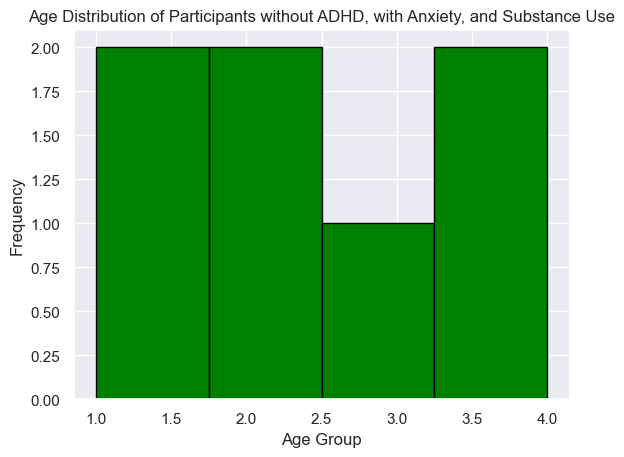

In [83]:
# Creating a histogram for the 'Age' column
plt.hist(filtered_participants_without_ADHD['AGE'], bins=4, color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution of Participants without ADHD, with Anxiety, and Substance Use')

# Displaying the histogram
plt.show()
#Analysis: From 82 individuals without ADHD, 7 has ANXIETY = 8.53% na d7 has SUBSTANCE abuse = 8.53%. As a result, indiviauls with out ADHD have a 17.07% of ANXIETY and SUBSTANCE. 
# The age distribution is higher in groups (1) = (17 to 29) years old  (2) = (30 to 39) years old , (4) = (50 to 67 years old) years old

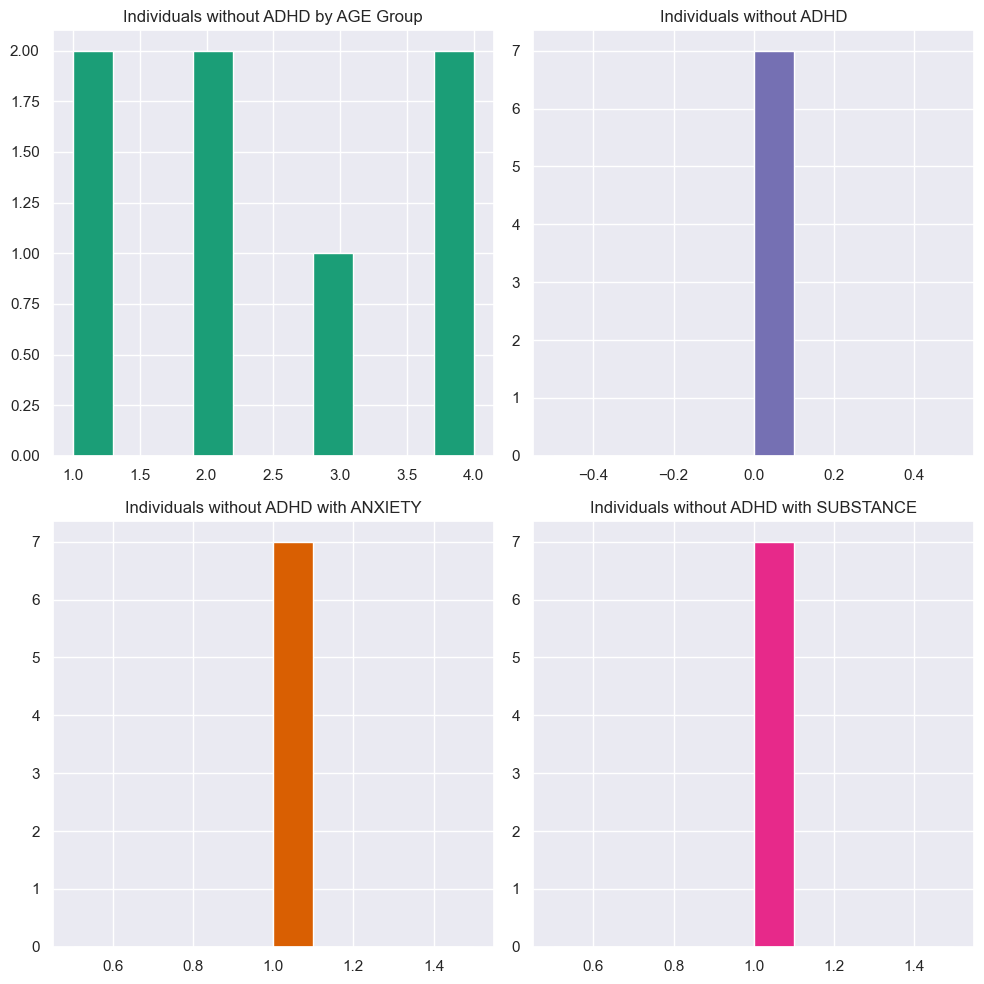

In [84]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(0)

# Create a DataFrame with 4 columns of random integers
df = pd.DataFrame(np.random.randint(0,100,size=(50, 4)), columns=list('ABCD'))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(filtered_participants_without_ADHD['AGE'], color='#1b9e77')
axs[0, 0].set_title('Individuals without ADHD by AGE Group')

axs[0, 1].hist(filtered_participants_without_ADHD['ADHD'], bins=10, color='#7570b3')
axs[0, 1].set_title('Individuals without ADHD')

axs[1, 0].hist(filtered_participants_without_ADHD['ANXIETY'], bins=10, color='#d95f02')
axs[1, 0].set_title('Individuals without ADHD with ANXIETY')

axs[1, 1].hist(filtered_participants_without_ADHD['SUBSTANCE'], bins=10, color='#e7298a')
axs[1, 1].set_title('Individuals without ADHD with SUBSTANCE')

# Add some space between subplots to avoid labels overlap
plt.tight_layout()
plt.show()
#Analysis:
#From 133 sample, 82 individuals do not have ADHD, 7 has ANXIETY = 8.53% and 7 has SUBSTANCE abuse = 8.53%. As a result, individuals with out ADHD have a 17.07% of ANXIETY and SUBSTANCE. 
#The age distribution is higher in groups (1) = (17 to 29) years old  (2) = (30 to 39) years old , (4) = (50 to 67 years old) years old. 

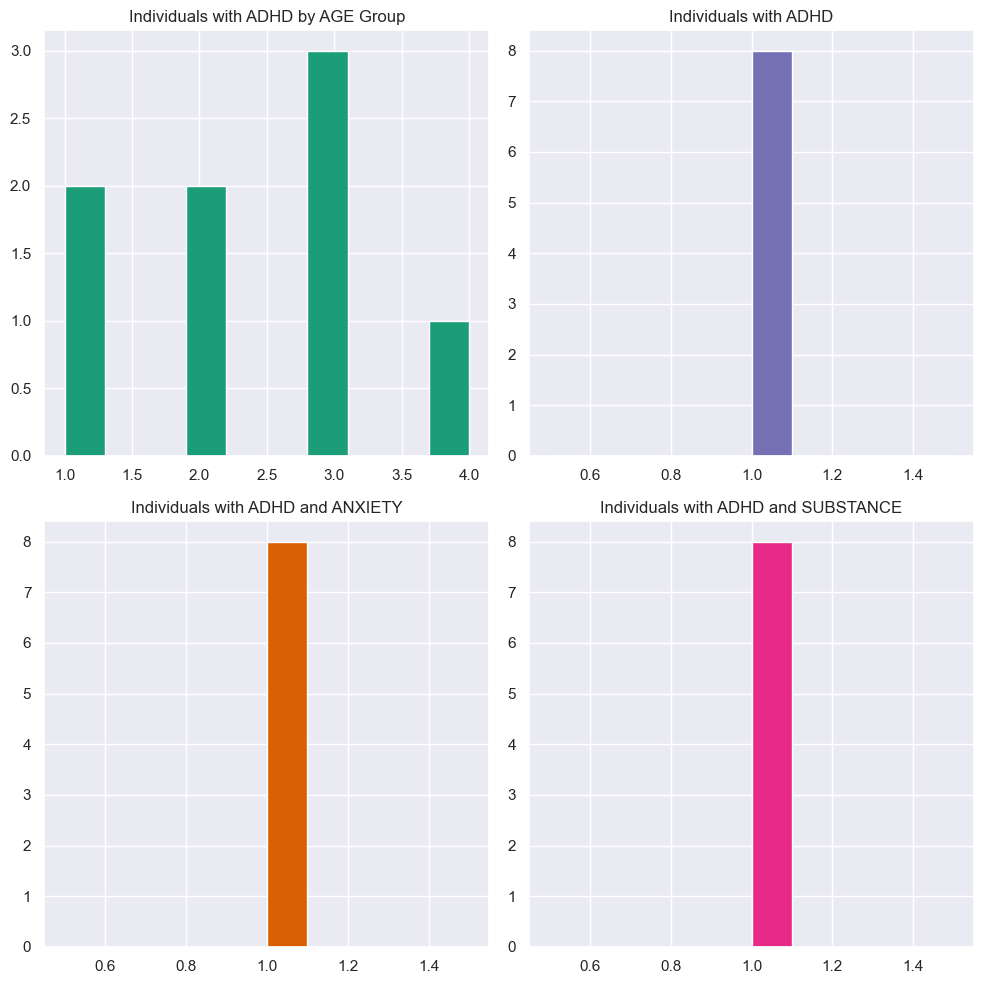

In [85]:
# Set a seed for reproducibility
np.random.seed(0)

# Create a DataFrame with 4 columns of random integers
df = pd.DataFrame(np.random.randint(0,100,size=(50, 4)), columns=list('ABCD'))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(filtered_participants_ADHD['AGE'], color='#1b9e77')
axs[0, 0].set_title('Individuals with ADHD by AGE Group')

axs[0, 1].hist(filtered_participants_ADHD['ADHD'], bins=10, color='#7570b3')
axs[0, 1].set_title('Individuals with ADHD')

axs[1, 0].hist(filtered_participants_ADHD['ANXIETY'], bins=10, color='#d95f02')
axs[1, 0].set_title('Individuals with ADHD and ANXIETY')

axs[1, 1].hist(filtered_participants_ADHD['SUBSTANCE'], bins=10, color='#e7298a')
axs[1, 1].set_title('Individuals with ADHD and SUBSTANCE')

# Add some space between subplots to avoid labels overlap
plt.tight_layout()
plt.show()

#Analysis: from a sample of 133 patients, 51 patients have ADHD, 8 has ANXIETY  = 15.68% and 8 has a SUBSTANCE = 15.68%.  As a result, 31.37% of individuals with ADHD have ANXIETY and SUBSTANCE abuse. 
#The age distribution is higher in group (3) =(40-49) years old. 

In [86]:
#M A C H I N E  L E A R N I N G 
df5.to_csv('df5_Update_1.csv') #Saving the df5 data set to be displayed in the Machine Learning Notebook